# Enoncé

1. Etudier la dépendance de l'erreur par rapport
     - à la distribution des points de l'échantillon (par exemple uniforme ou équirépartis)
     - La loi du bruit.
     - Le degrés du polynôme.
2. Comment pouvons nous estimer l'erreur commise à partir de l'échantillon et sans la cible?

In [1]:
import lib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
cible = lib.Cible(
    fonction=lambda x: np.exp(1. / (2. + np.sin(5 * x) * np.cos(20 * x))),
    gauche=0.,
    droite=1.,
)

In [4]:
echantillon = lib.genere_echantillon(
    cible=cible, 
    nb_points=20, 
    choix_points=lib.ChoixPoints.uniforme, 
    choix_bruit=lib.ChoixBruit.normale, 
    amplitude=0.1
)

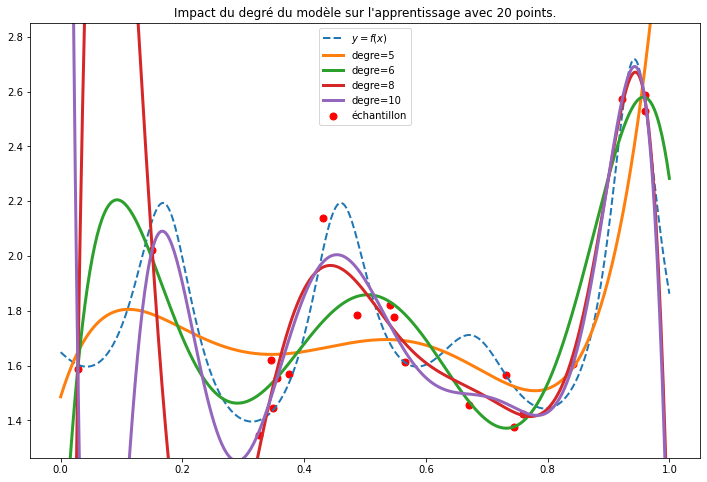

In [5]:
fig, rep = plt.subplots()
rep.set_title(
    "Impact du degré du modèle sur l'apprentissage avec " 
    f"{len(echantillon.abcisses)} points."
)
cible.affichage(rep)
echantillon.affichage(rep)
for degre in (5, 6, 8, 10):
    modele = lib.ModelePolynomial(degre)
    modele.entraine(echantillon)
    modele.affichage(cible=cible, repere=rep)

rep.set_ylim(cible.min, cible.max)
rep.legend();

**Remarque** le graphe ci-dessus devenant illisible on séparera les différentes courbes, en prenant soin de garder des ordonnées communes.

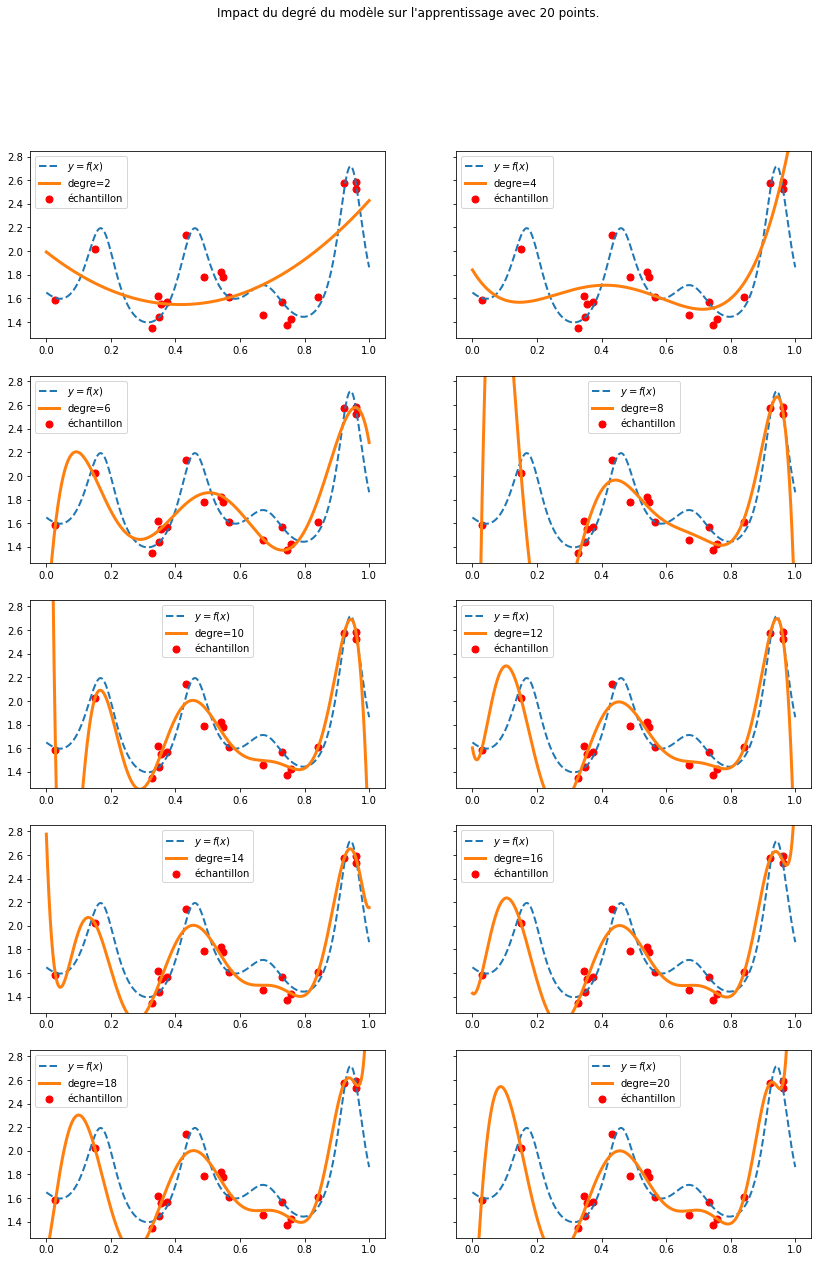

In [6]:
degres = [2 * d for d in range(1, 11)]
fig, reps = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(14, 20))

fig.suptitle(
    "Impact du degré du modèle sur l'apprentissage avec " 
    f"{len(echantillon.abcisses)} points."
)
for degre, rep in zip(degres, reps.flatten()):
    cible.affichage(rep)
    echantillon.affichage(rep)
    modele = lib.ModelePolynomial(degre)
    modele.entraine(echantillon)
    modele.affichage(cible=cible, repere=rep)
    rep.set_ylim(cible.min, cible.max)
    rep.legend()

# Impact de l'échantillon sur un modèle à degrés fixe:

1. Variation du nombre de points
2. Alternative entre uniforme/équirépartis.
3. Alternative entre bruit gaussien/uniforme/sans bruit.


## Variation nombre de points

In [7]:
def etude_points(degre: int, nbs: list[int]):
    modeles = dict()
    echantillons = dict()
    for nb_points in nbs:
        modeles[nb_points] = lib.ModelePolynomial(degre=degre)
        echantillons[nb_points] = lib.genere_echantillon(
            cible=cible, 
            nb_points=nb_points, 
            choix_points=lib.ChoixPoints.equirepartis,
            choix_bruit=lib.ChoixBruit.uniforme,
            amplitude=0.05,
        )
        modeles[nb_points].entraine(echantillon=echantillons[nb_points])
    
    nb_lignes = round(len(nbs) / 2)
    fig, reps = plt.subplots(nrows=nb_lignes, ncols=2, figsize=(14, 4 * nb_lignes))
    fig.suptitle(
        "Etude de l'impact du nombre de points de l'échantillon pour "
        f"un modèle de degré {degre}",
        fontsize=15,
    )
    for nb_points, rep in zip(nbs, reps.flatten()):
        cible.affichage(rep)
        echantillons[nb_points].affichage(rep)
        modeles[nb_points].affichage(repere=rep, cible=cible)
        rep.set_ylim(cible.min, cible.max)
        rep.set_title(f"{nb_points} points")
    

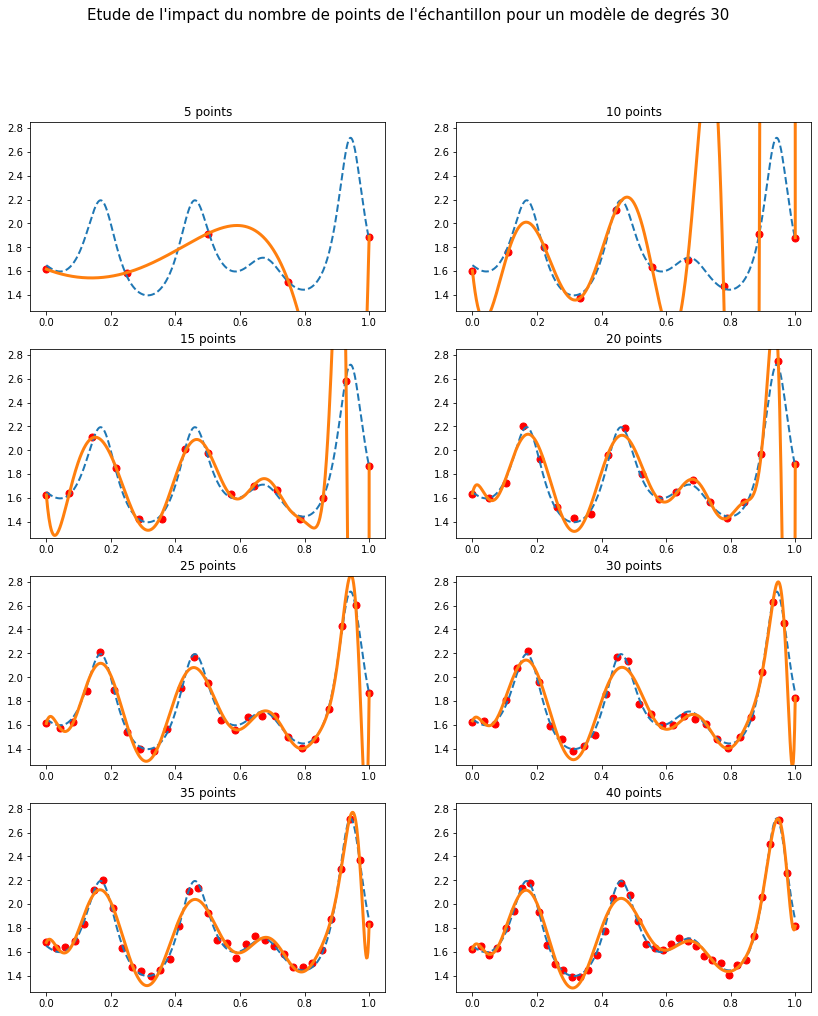

In [8]:
etude_points(degre=30, nbs=[5 * nb for nb in range(1, 9)])

## Alternative d'échantillonnage

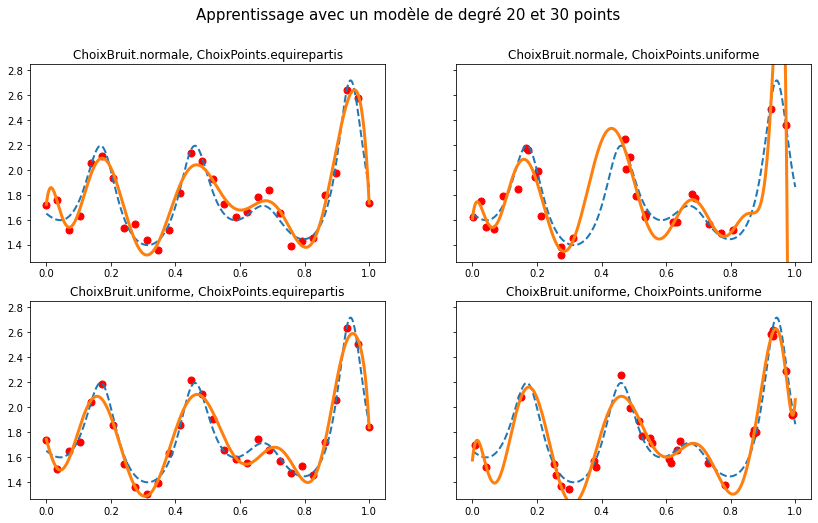

In [9]:
degre = 20
nb_points = 30
resultats = list()
for choix_bruit in lib.ChoixBruit:
    for choix_points in lib.ChoixPoints:
        echantillon = lib.genere_echantillon(
            cible=cible, 
            nb_points=nb_points, 
            choix_points=choix_points,
            choix_bruit=choix_bruit,
            amplitude=0.1,
        )
        modele = lib.ModelePolynomial(degre=degre)
        modele.entraine(echantillon)
        resultats.append((choix_points, choix_bruit, echantillon, modele))
        
fig, reps = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(14, 8))
fig.suptitle(
    "Apprentissage avec "
    f"un modèle de degré {degre}"
    f" et {nb_points} points",
    fontsize=15,
)
for (cp, cb, ech, mod), rep in zip(resultats, reps.flatten()):
    cible.affichage(rep)
    ech.affichage(rep)
    mod.affichage(cible=cible, repere=rep)
    rep.set_ylim(cible.min, cible.max)
    rep.set_title(f"{cb}, {cp}")
    

**Conclusion** 
- On constate une très forte dépendance de l'entrainement sur la disposition des abcisses de l'échantillon,
- La dépendance au bruit est présente mais moins problématique.

# Impact de la complexité du modèle à échantillon donné.



In [10]:
def etude_degres(choix_points, choix_bruit):
    echantillon = lib.genere_echantillon(
        cible=cible, 
        nb_points=20, 
        choix_points=choix_points, 
        choix_bruit=choix_bruit, 
        amplitude=0.01
    )
    degres = [d for d in range(1, 30)]
    erreurs_objective = list()
    erreurs_empirique = list()

    for degre in degres:
        modele = lib.ModelePolynomial(degre)
        modele.entraine(echantillon)
        erreurs_objective.append(lib.erreur_objective(modele, cible))
        erreurs_empirique.append(lib.erreur_empirique(modele, echantillon))
    return degres, erreurs_empirique, erreurs_objective
    

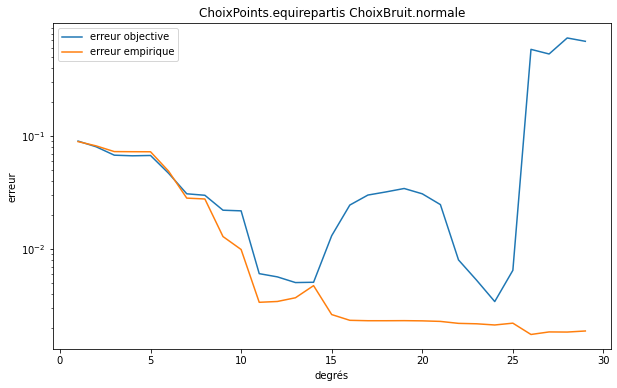

In [11]:
fig, rep = plt.subplots(figsize=(10, 6))
choix_bruit = lib.ChoixBruit.normale
choix_points = lib.ChoixPoints.equirepartis
degres, erreurs_empirique, erreurs_objective = etude_degres(
    choix_bruit=choix_bruit, 
    choix_points=choix_points
)
rep.set_title(f"{choix_points} {choix_bruit}")
rep.set_xlabel("degrés")
rep.set_ylabel("erreur")
rep.semilogy(degres, erreurs_objective, label="erreur objective")
rep.semilogy(degres, erreurs_empirique, label="erreur empirique")
rep.legend();

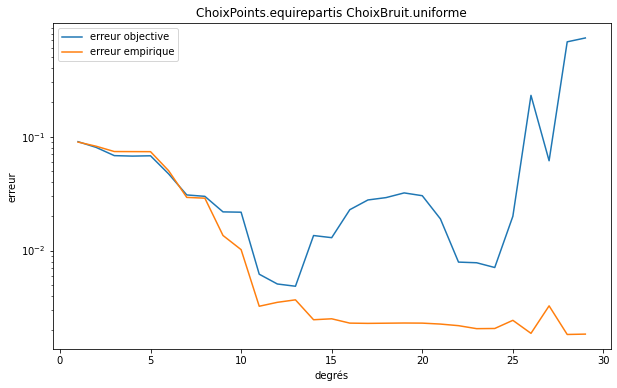

In [12]:
fig, rep = plt.subplots(figsize=(10, 6))
choix_bruit = lib.ChoixBruit.uniforme
choix_points = lib.ChoixPoints.equirepartis
degres, erreurs_empirique, erreurs_objective = etude_degres(
    choix_bruit=choix_bruit, 
    choix_points=choix_points
)
rep.set_title(f"{choix_points} {choix_bruit}")
rep.set_xlabel("degrés")
rep.set_ylabel("erreur")
rep.semilogy(degres, erreurs_objective, label="erreur objective")
rep.semilogy(degres, erreurs_empirique, label="erreur empirique")
rep.legend()

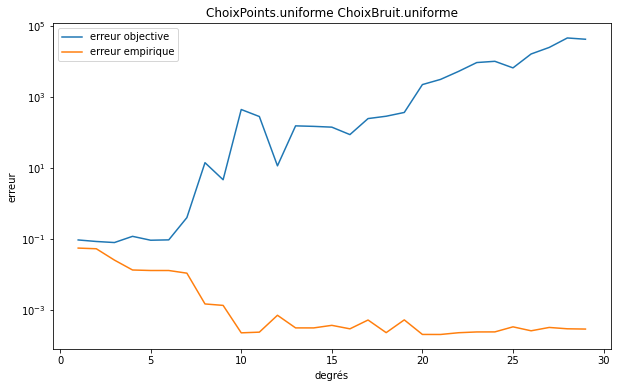

In [13]:
fig, rep = plt.subplots(figsize=(10, 6))
choix_bruit = lib.ChoixBruit.uniforme
choix_points = lib.ChoixPoints.uniforme
degres, erreurs_empirique, erreurs_objective = etude_degres(
    choix_bruit=choix_bruit, 
    choix_points=choix_points
)
rep.set_title(f"{choix_points} {choix_bruit}")
rep.set_xlabel("degrés")
rep.set_ylabel("erreur")
rep.semilogy(degres, erreurs_objective, label="erreur objective")
rep.semilogy(degres, erreurs_empirique, label="erreur empirique")
rep.legend()

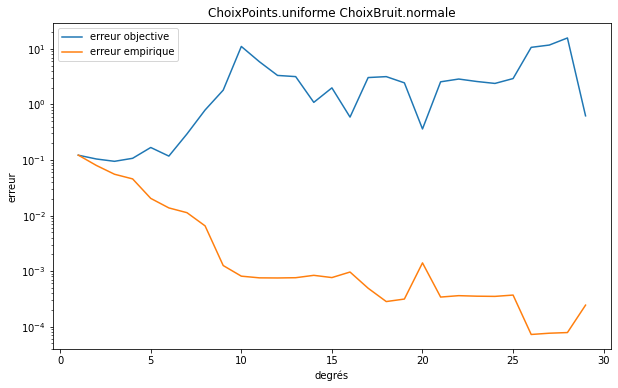

In [14]:
fig, rep = plt.subplots(figsize=(10, 6))
choix_bruit = lib.ChoixBruit.normale
choix_points = lib.ChoixPoints.uniforme
degres, erreurs_empirique, erreurs_objective = etude_degres(
    choix_bruit=choix_bruit, 
    choix_points=choix_points
)
rep.set_title(f"{choix_points} {choix_bruit}")
rep.set_xlabel("degrés")
rep.set_ylabel("erreur")
rep.semilogy(degres, erreurs_objective, label="erreur objective")
rep.semilogy(degres, erreurs_empirique, label="erreur empirique")
rep.legend()

## Conclusion

- On constate qu'alors que l'erreur empirique est toujours décroissante, l'erreur objective commence par décroitre avant d'augmenter.

- On dit qu'on a à faire à du surapprentissage: le modèle devient sensible au bruit et n'arrive plus à généraliser au delà de l'échantillon d'entrainement.

- Lorsque le  modèle est trop peu complexe les deux erreurs sont grandes l'apprentissage est biaisé. Lorsque le modèle est trop complexe, les erreurs sont très différentes, on a une grande variance par rapport à l'échantillon. On parle de [dilemne biais-variance](https://fr.wikipedia.org/wiki/Dilemme_biais-variance).
 
- Ici on avait accès à la cible cachée derrière l'échantillon ce qui nous permettait de construire l'erreur objective et donc de déterminer si on était en surapprentissage. En situation réelle, on n'a que l'échantillon il faut donc une méthodologie spécifique: on découpera l'échantillon aléatoirement entre une partie que l'utilisera pour l'apprentissage et la construction de l'erreur empirique et une autre partie qui nous servira juste à construire l'erreur objective. On parlera de `train test split`.